# understainding for token and positional enbedding

## prepare

In [2]:
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader
import pickle as pkl

In [3]:
dataset_dir_path = '../../data/processed/tokenized_data/'
with open(dataset_dir_path + 'train_data.pkl', 'rb') as f:
    tokenized_train_data = pkl.load(f)

with open(dataset_dir_path + 'valid_data.pkl', 'rb') as f:
    tokenized_valid_data = pkl.load(f)

In [4]:
vocab_dir_path = '../../data/processed/vocab/'

with open(vocab_dir_path + 'token2idx_de.pkl', 'rb') as f:
    token2idx_de= pkl.load(f)
with open(vocab_dir_path + 'token2idx_en.pkl', 'rb') as f:
    token2idx_en = pkl.load(f)
with open(vocab_dir_path + 'idx2token_de.pkl', 'rb') as f:
    idx2token_de = pkl.load(f)
with open(vocab_dir_path + 'idx2token_en.pkl', 'rb') as f:
    idx2token_en = pkl.load(f)

In [5]:
batch_size = 128
PAD_INDEX = token2idx_de['<pad>']
START_INDEX = token2idx_en['<start>']
END_INDEX = token2idx_en['<end>']

In [6]:
def generate_batch(data_batch):
    batch_src = []
    batch_tgt = []
    for src, tgt in data_batch:
        batch_src.append(src)
        batch_tgt.append(tgt)
    
    batch_src = pad_sequence(batch_src, padding_value=PAD_INDEX)
    batch_tgt = pad_sequence(batch_tgt, padding_value=PAD_INDEX)

    return batch_src, batch_tgt

In [7]:
train_iter = DataLoader(tokenized_train_data, batch_size=batch_size, shuffle=True, collate_fn=generate_batch)
valid_iter = DataLoader(tokenized_valid_data, batch_size=batch_size, shuffle=True, collate_fn=generate_batch)

In [8]:
import math
import torch
import torch.nn as nn
from torch import Tensor

## token embedding

In [9]:
vocab_size = len(token2idx_de)
embedding_dim = 512
print('vocab size:', vocab_size)


vocab size: 19620


In [10]:
# make a lookup table for the token embedding
embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=PAD_INDEX)


In [11]:
embedding(torch.tensor([5, 10])).shape # test the embedding layer

torch.Size([2, 512])

In [12]:
embedding(torch.tensor([5])) # test the embedding layer

tensor([[-1.5026, -0.4811, -0.0323,  1.7850, -0.5323,  0.9266,  2.7262, -1.0067,
          0.5935,  0.6293,  0.2984,  1.0269, -0.5738, -0.6004,  0.8404, -0.2716,
          0.8257, -1.0421, -0.6144, -1.1219,  1.9499,  0.8224, -0.4270, -1.8331,
          1.1384,  0.6279,  0.5229, -1.0098,  1.4716, -0.0923, -0.7622,  0.9684,
         -0.0120, -0.1822,  0.1265, -0.3264, -1.8429,  1.3729,  0.3356,  1.2477,
         -1.5135,  1.3007,  1.7940,  0.4336, -0.9696, -0.1015, -1.0505,  1.1983,
         -0.6642, -1.4068, -1.5135, -1.0659,  1.2912,  0.3073, -0.0934,  0.0941,
         -0.1364,  1.9226,  0.4284, -1.0677,  0.9849, -0.7128, -0.1811, -0.3839,
         -0.1867, -0.1533, -1.0386,  0.2961, -0.9648,  2.7183, -0.5955, -0.4129,
          1.5042,  0.9064, -0.5812,  1.6095, -0.5488, -0.6178,  2.3974,  0.7300,
         -0.6679,  0.5864, -1.6372,  0.4942, -0.2777,  0.3680, -0.2476,  0.4373,
         -1.5252,  0.0385,  1.0066,  0.9110, -0.4950,  1.0790,  1.0509,  0.4197,
         -0.5732, -0.2001,  

## positional encoding

In [13]:
embedding_size = 512
maxlen = 5000

den shape : torch.Size([256])


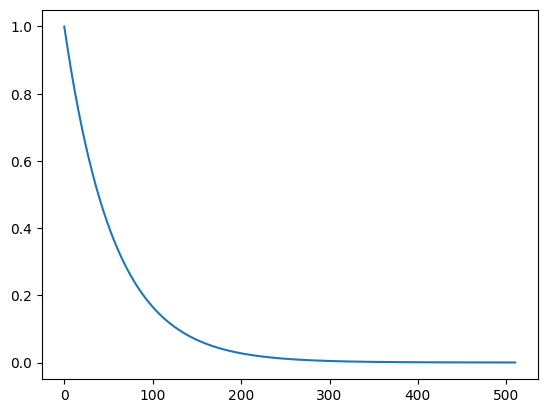

In [14]:
import matplotlib.pyplot as plt
den = torch.exp(-torch.arange(0, embedding_size, 2) * math.log(10000) / embedding_size)
print(f'den shape : {den.shape}')
fig = plt.figure()
ax = fig.add_subplot(111)
x = torch.arange(0, embedding_size, 2)
ax.plot(x, den)
plt.show()

In [15]:
pos = torch.arange(0, maxlen).reshape(maxlen, 1)
print(f'pos shape : {pos.shape}')

pos shape : torch.Size([5000, 1])


In [16]:
(pos * den).shape # test the position embedding

torch.Size([5000, 256])

In [17]:
embedding_pos = torch.zeros((maxlen, embedding_size))
embedding_pos[:, 0::2] = torch.sin(pos * den)
embedding_pos[:, 1::2] = torch.cos(pos * den)
print(f'pos embedding shape : {embedding_pos.shape}')

pos embedding shape : torch.Size([5000, 512])


In [18]:
embedding_pos = embedding_pos.unsqueeze(-2)
print(f'pos embedding shape : {embedding_pos.shape}')

pos embedding shape : torch.Size([5000, 1, 512])


In [19]:
embedding_pos[: 24, ].shape

torch.Size([24, 1, 512])

In [20]:
embedding_src = embedding(torch.tensor([5, 10, 12])) + embedding_pos[:3, :]

In [38]:
#embedding(torch.tensor([5, 10, 12])).shape # test the embedding layer
embedding_pos[:3, :].shape # test the embedding layer
#embedding_src.shape # test the embedding layer

torch.Size([3, 1, 512])

Text(0.5, 1.0, 'Positional Encoding')

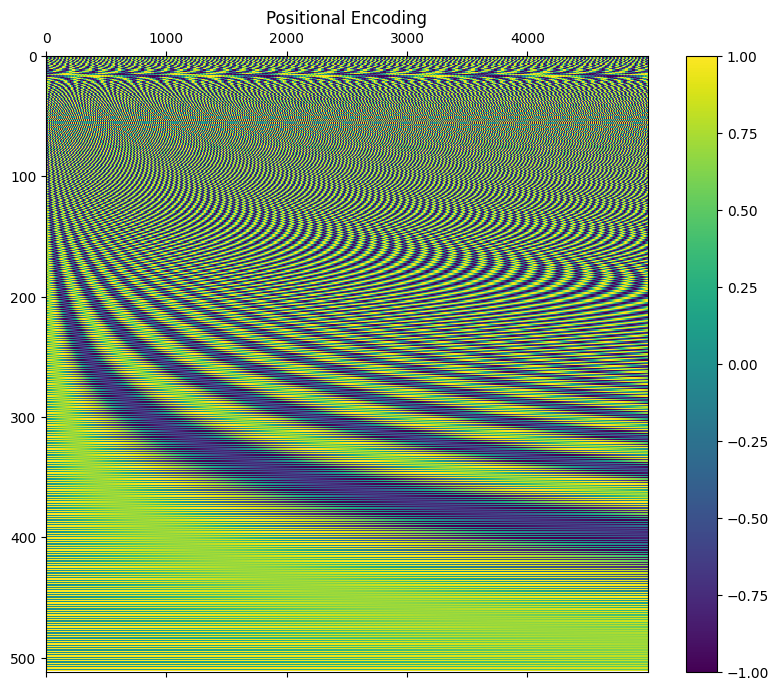

In [22]:
# plot embedding_pos as heatmap
img = embedding_pos.squeeze(1).T
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
cax = ax.matshow(img, cmap='viridis', aspect=10)
fig.colorbar(cax)
plt.title('Positional Encoding')

